# Project: TMDb movie data investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this project we will be analyzing imdb movie data. The main focus of our investigation will be: 
1. Which genres are most popular from 2005 to 2015 (for one decade)?
2. What is the relationship between a director and a genre and its effect on revenue?

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [93]:
# Loading data 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [95]:
# From the info from the last cell I have dropped 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords',
# 'overview', 'runtime', 'production_companies' because these seem to be irrelevent for my investigation purposes
# I have dropped all nulls as well.

df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies'], axis = 1, inplace = True)

In [96]:
df.head()

,id,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


In [98]:
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [99]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
id                10732 non-null int64
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [100]:
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,1.073200e+04,1.073200e+04
mean,65199.598025,0.652609,219.802739,5.964620,2001.260436,1.776644e+07,5.200147e+07
std,91466.515616,1.004757,578.789325,0.930286,12.819831,3.446490e+07,1.454192e+08
min,5.000000,0.000188,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.750000,0.210766,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20331.000000,0.387136,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73943.750000,0.720621,148.000000,6.600000,2011.000000,2.111556e+07,3.470526e+07
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from 2005 to 2015 (for one decade)?)

In [101]:
# Here I have defined a function which splits a row into many rows depending upon the number of delimiters for a perticular column

def split_df_list(df_to_modify, column_to_modify, delimiter):          
    def splitlist_to_rows(row, row_coll, column_to_modify, delimiter):
        split_row = row[column_to_modify].split(delimiter)           
        for sr in split_row:
            new_row = row.to_dict()
            new_row[column_to_modify] = sr
            row_coll.append(new_row)
    new_rows = []
    df_to_modify.apply(splitlist_to_rows, axis = 1, args=(new_rows, column_to_modify, delimiter))
    new_df = pd.DataFrame(new_rows)
    return new_df
# splitting genres
df_genre_split = split_df_list(df, 'genres', '|')
df_genre_split.head()

,budget_adj,cast,director,genres,id,original_title,popularity,release_date,release_year,revenue_adj,vote_average,vote_count
0,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,135397,Jurassic World,32.985763,6/9/15,2015,1.392446e+09,6.5,5562
1,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,135397,Jurassic World,32.985763,6/9/15,2015,1.392446e+09,6.5,5562
2,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,135397,Jurassic World,32.985763,6/9/15,2015,1.392446e+09,6.5,5562
3,1.379999e+08,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,135397,Jurassic World,32.985763,6/9/15,2015,1.392446e+09,6.5,5562
4,1.379999e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,76341,Mad Max: Fury Road,28.419936,5/13/15,2015,3.481613e+08,7.1,6185


In [102]:
# creating array for unique genres
gen_arr = df_genre_split['genres'].unique()
gen_arr

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [103]:
# creating mask for a perticular date range (here 2005 - 2015)
mask = (df_genre_split['release_date'] >= '01/01/2005') & (df_genre_split['release_date'] <= '31/12/2015')

In [104]:
df_genre_2005_2015 = df_genre_split[mask]  #a new dataframe for a perticular 2005 to 2015
df_genre_2005_2015.head()

,budget_adj,cast,director,genres,id,original_title,popularity,release_date,release_year,revenue_adj,vote_average,vote_count
8,1.012000e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure,262500,Insurgent,13.112507,3/18/15,2015,2.716190e+08,6.3,2480
9,1.012000e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Science Fiction,262500,Insurgent,13.112507,3/18/15,2015,2.716190e+08,6.3,2480
10,1.012000e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Thriller,262500,Insurgent,13.112507,3/18/15,2015,2.716190e+08,6.3,2480
11,1.839999e+08,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action,140607,Star Wars: The Force Awakens,11.173104,12/15/15,2015,1.902723e+09,7.5,5292
12,1.839999e+08,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Adventure,140607,Star Wars: The Force Awakens,11.173104,12/15/15,2015,1.902723e+09,7.5,5292


genres
Drama              2352
Comedy             1826
Thriller           1407
Action             1100
Romance             848
Horror              821
Adventure           703
Crime               655
Family              649
Science Fiction     572
Fantasy             483
Mystery             412
Animation           382
Documentary         229
Music               184
Name: id, dtype: int64

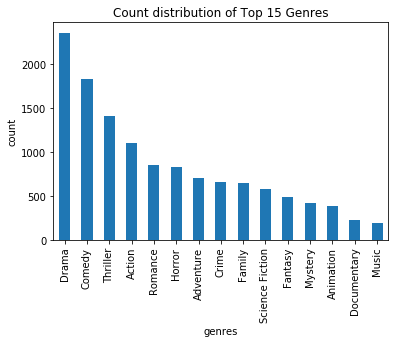

In [105]:
# I am exploring the relationship between Popularity Vs Genre. 
# So Plotting count distribution on Genre and Histogram for Popularity will be helpful
# I will plot it on the data for date range 2005-2015

df_genre_2005_2015.groupby(['genres'])['id'].count().sort_values(ascending=False).head(15).plot(kind='bar')
plt.ylabel('count')
plt.title('Count distribution of Top 15 Genres')
df_genre_2005_2015.groupby(['genres'])['id'].count().sort_values(ascending=False).head(15)

,popularity
count,13213.000000
mean,0.696154
std,1.053101
min,0.000188
25%,0.222458
50%,0.402939
75%,0.768724
max,24.949134


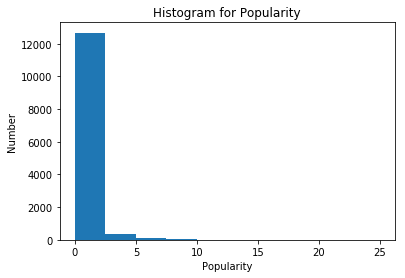

In [106]:
# histogram for the Popularity

df_genre_2005_2015['popularity'].plot.hist()
plt.xlabel('Popularity')
plt.ylabel('Number')
plt.title('Histogram for Popularity')
pd.DataFrame(df_genre_2005_2015['popularity'].describe())

In [107]:
#Most of the paopularity is concentrated within 0.1 to 5. I can see how many movies are with more than 5 popuarity?

df_genre_2005_2015[(df_genre_2005_2015['popularity'] > 5)]['id'].count()


148

In [108]:
#I can see how many movies are with more than 3 popuarity?

df_genre_2005_2015[(df_genre_2005_2015['popularity'] > 3)]['id'].count()


366

In [109]:
#Now how many movies are with LESS than 0.1 pouarity?

df_genre_2005_2015[(df_genre_2005_2015['popularity'] < 0.01)]['id'].count()


75

In [110]:
#Looking at the above histogram and number of movies which have popularity more than 3 or less than 0.01, I can assume that they are outliers.
# It is better to drop these outliers as they are exception.

df_genre_2005_2015_clean = df_genre_2005_2015[(df_genre_2005_2015['popularity'] > 0.01) & (df_genre_2005_2015['popularity'] < 3)]

df_genre_2005_2015_clean.head()

,budget_adj,cast,director,genres,id,original_title,popularity,release_date,release_year,revenue_adj,vote_average,vote_count
139,1.241999e+08,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Fantasy,228161,Home,2.976436,3/18/15,2015,3.393612e+08,6.9,1060
140,1.241999e+08,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Comedy,228161,Home,2.976436,3/18/15,2015,3.393612e+08,6.9,1060
141,1.241999e+08,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Animation,228161,Home,2.976436,3/18/15,2015,3.393612e+08,6.9,1060
142,1.241999e+08,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Science Fiction,228161,Home,2.976436,3/18/15,2015,3.393612e+08,6.9,1060
143,1.241999e+08,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,Tim Johnson,Family,228161,Home,2.976436,3/18/15,2015,3.393612e+08,6.9,1060


In [111]:
df_genres_pop = pd.DataFrame()  # an empty dataframe is created which will hold genre and its average popularity over a date range
df_genres_pop_clean = pd.DataFrame()  # Same as df_genres_pop but it will be on clean data

for i in gen_arr:
    df_genre_dated = df_genre_2005_2015[(df_genre_2005_2015['genres'] == i)] # a dataframe for a perticular genre and date range
    sum_pop = df_genre_dated['popularity'].sum()/len(df_genre_dated) # average of popularity of a perticular genre over a date range
    df_genres_pop = df_genres_pop.append({'genres': i, 'avgPopularity' : sum_pop}, ignore_index=True) # appending these to the new dataframe
    
    df_genre_dated = df_genre_2005_2015_clean[(df_genre_2005_2015_clean['genres'] == i)] # a dataframe for a perticular genre and date range on clean data
    sum_pop = df_genre_dated['popularity'].sum()/len(df_genre_dated) # average of popularity of a perticular genre over a date range
    df_genres_pop_clean = df_genres_pop_clean.append({'genres': i, 'avgPopularity' : sum_pop}, ignore_index=True) # appending these to the new dataframe

df_genres_pop.head()

,avgPopularity,genres
0,0.855610,Action
1,1.126964,Adventure
2,0.886484,Science Fiction
3,0.707233,Thriller
4,1.019025,Fantasy


In [112]:
df_genres_pop_clean.head()

,avgPopularity,genres
0,0.625769,Action
1,0.727175,Adventure
2,0.589042,Science Fiction
3,0.586415,Thriller
4,0.689051,Fantasy


,avgPopularity,genres
1,1.126964,Adventure
4,1.019025,Fantasy
2,0.886484,Science Fiction
9,0.878756,Animation
0,0.855610,Action


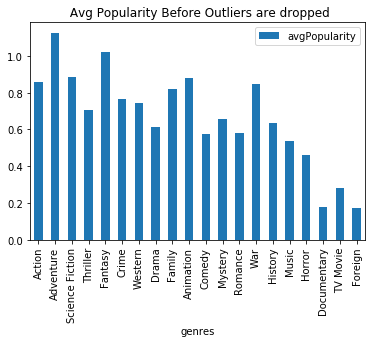

In [113]:
# Here I have created a bar plot for popularity vs genres over the latest decade available (2005 - 2015)
df_genres_pop.plot(x = 'genres', y = 'avgPopularity', title = ' Avg Popularity Before Outliers are dropped', kind = 'bar');
df_genres_pop.sort_values(by='avgPopularity', ascending=False).head()

,avgPopularity,genres
9,0.736489,Animation
1,0.727175,Adventure
4,0.689051,Fantasy
13,0.678826,War
8,0.678411,Family


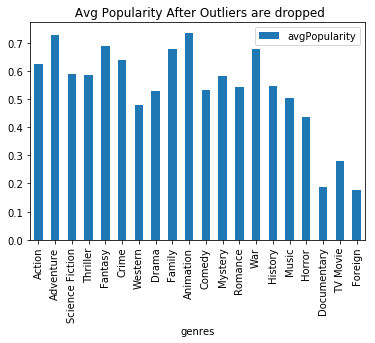

In [114]:
# Here I have created a bar plot for popularity vs genres over the latest decade available (2005 - 2015)
df_genres_pop_clean.plot(x = 'genres', y = 'avgPopularity', title = ' Avg Popularity After Outliers are dropped', kind = 'bar');
df_genres_pop_clean.sort_values(by='avgPopularity', ascending=False).head()

### Research Question 2  (What is the relationship between a director and a genre and its effect on revenue?)

In [115]:
df_for_director = split_df_list(df, 'director', '|')  # calling function from cells defined above and splitting for each director

director
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      30
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
David Cronenberg     19
Robert Rodriguez     19
Barry Levinson       19
Wes Craven           19
Tim Burton           19
John Carpenter       19
Name: id, dtype: int64

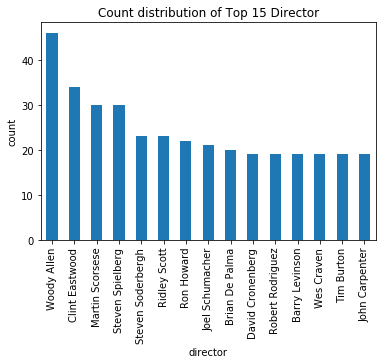

In [116]:
#plotting for the Count distribution of Director.
df_for_director.groupby(['director'])['id'].count().sort_values(ascending=False).head(15).plot(kind='bar')
plt.ylabel('count')
plt.title('Count distribution of Top 15 Director')
df_for_director.groupby(['director'])['id'].count().sort_values(ascending=False).head(15)


,revenue_adj
count,1.073200e+04
mean,5.200147e+07
std,1.454192e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.470526e+07
max,2.827124e+09


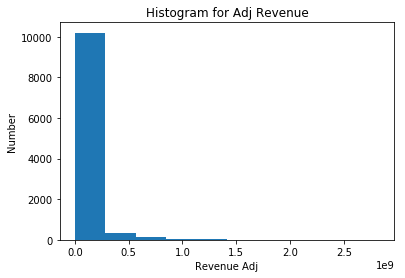

In [117]:
# histogram for the Revenue_adj on whole Data
df['revenue_adj'].plot.hist()
plt.xlabel('Revenue Adj')
plt.ylabel('Number')
plt.title('Histogram for Adj Revenue')
pd.DataFrame(df['revenue_adj'].describe())


In [118]:
#number of data points above 0.3e+9.
df_for_director[(df_for_director['revenue_adj'] > 0.3e+9)]['id'].count()

563

In [119]:
#Taking only clean data
df_for_director_clean = df_for_director[(df_for_director['revenue_adj'] < 0.3e+9)]

genres
Drama              4843
Comedy             3952
Thriller           2911
Action             2331
Horror             1845
Romance            1717
Adventure          1370
Crime              1342
Family             1285
Science Fiction    1240
Fantasy             893
Animation           827
Mystery             803
Documentary         589
Music               430
Name: id, dtype: int64

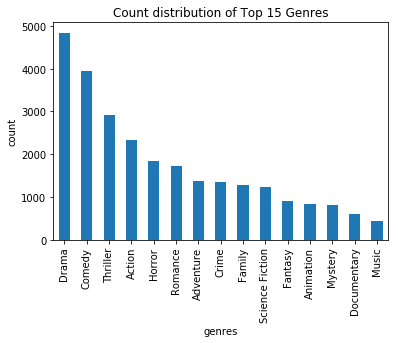

In [120]:
#Spllitting the data for Genres
df_for_director_genres_clean = split_df_list(df_for_director_clean, 'genres', '|')

#Count distribution of the Generes on Clean data
df_for_director_genres_clean.groupby(by=['genres'])['id'].count().sort_values(ascending=False).head(15).plot(kind='bar')
plt.ylabel('count')
plt.title('Count distribution of Top 15 Genres')
df_for_director_genres_clean.groupby(by=['genres'])['id'].count().sort_values(ascending=False).head(15)

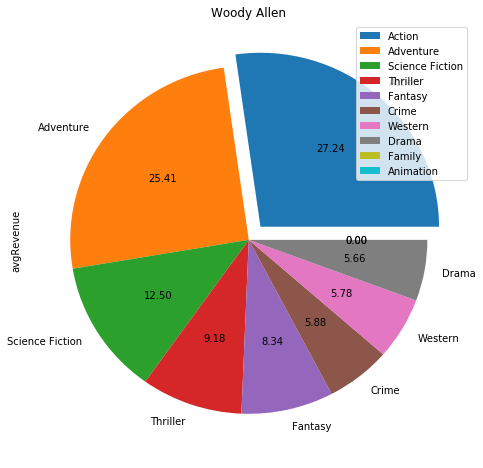

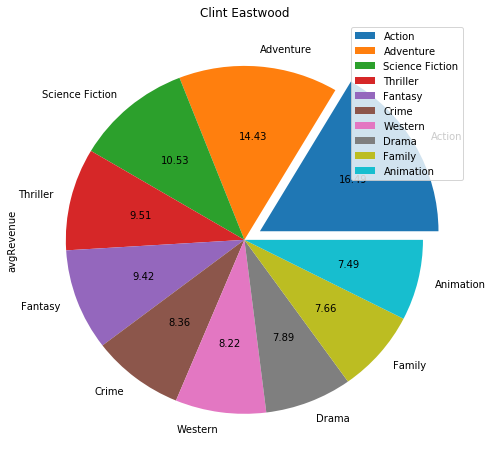

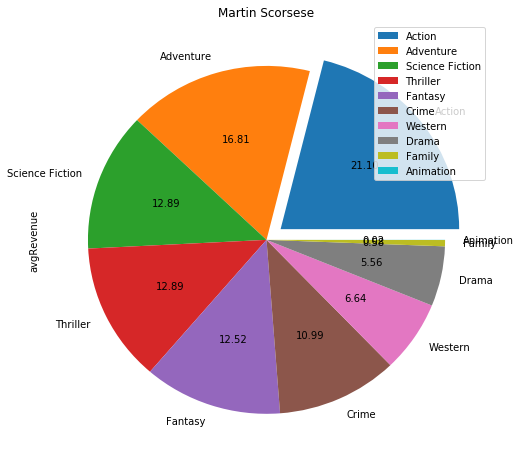

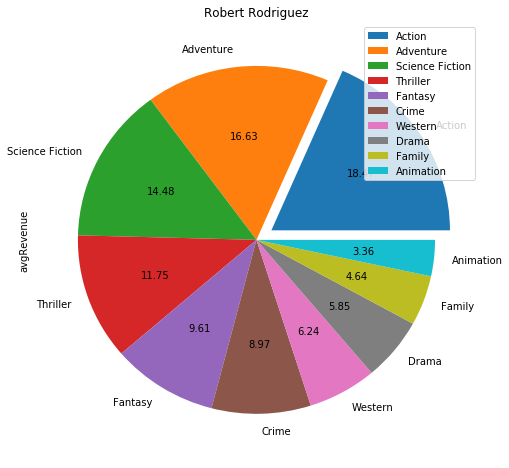

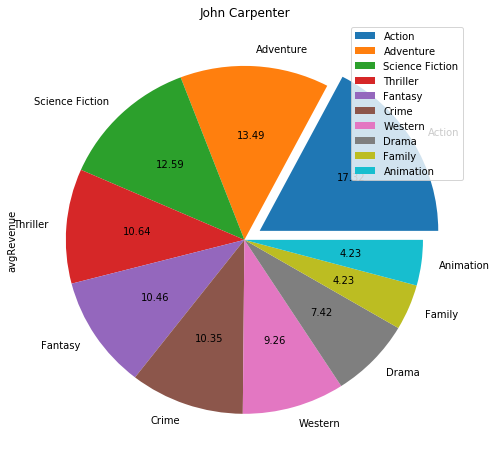

In [121]:
# creating a dataframe with two columns: director and number of movies that perticular director has directed
df_director_temp = pd.DataFrame(df_for_director_clean['director'].value_counts().reset_index())
df_director_temp.columns = ['director', 'count']

# dataframe containing splitted genres as well
df_for_director_genres = split_df_list(df_for_director, 'genres', '|')

# creating array of uniqu genre names from the dataframe
ar_for_genere = df_for_director_genres['genres'].unique() 

# taking top 5 directors in terms of numbers of movies directed
df_director_temp = df_director_temp.head(5)

# an empty dataframe which will hold director, genre and average revenue_adj
df_dir_gen_revenue = pd.DataFrame() 

for d in df_director_temp['director']:  # iteration over director names
    for g in ar_for_genere: #df_for_genres['genres']:   # iteration over genre names
        df_dir_gen_rve_new = df_for_director_genres[(df_for_director_genres['director'] == d) &
                                             (df_for_director_genres['genres'] == g)]
        if len(df_dir_gen_rve_new) > 0 :    # if one or more movie directed by a director in a specific genre
            sum_rev_adj = df_dir_gen_rve_new['revenue_adj'].sum()/len(df_dir_gen_rve_new)
        else:                               # if there is no movie directed by a director in a specific genre
            sum_rev_adj = 0                  
        df_dir_gen_revenue = df_dir_gen_revenue.append({'director' : d, 'genres': g, 
                                                        'avgRevenue' : sum_rev_adj}, ignore_index=True)  # appending to the empty dataframe

explode = (0.1,0,0,0,0,0,0,0,0,0) # To standout the top revenue 
for d in df_director_temp['director']:
    # Taking the Top 10 Genre by a director in terms of average reveue_adj
    df_for_plot = df_dir_gen_revenue[(df_dir_gen_revenue['director'] == d)].sort_values(by=['avgRevenue'], ascending=False).head(10)
    
    # Plotting PIE chart
    df_for_plot.plot(y = 'avgRevenue', kind= 'pie', title = d, 
                     labels=df_dir_gen_revenue['genres'], autopct='%.2f', explode=explode, figsize =(8,8))

#plt.theme

<a id='conclusions'></a>
## Conclusions

Conclusion from question 1:

Data Cleaning: For this Question, I see that there are outliers in popularity which skew the result. For example, Avg popularity for the Adventure before the cleaning of outliers is 1.12 but after removing the outliers it goes down to 0.72. Also I can see before the cleaning of outliers Adventure was perceived as most popular. But after the cleaning it is actually Animation which is popular.

Limitation: From Genre count distribution, it seems that I do not have enough data for few of the genres, for e.g. Foreign, TV Movies, Documentary. Also there are few genres which have large number of movies. So not enough data on few of the genres is a one major shortcoming.

Result: The visualization of the data (Data after cleaning the outliers) from the plot clearly indicates that in the decade (2005 - 2015), Animation movies were most popular followed by Adventure, fantasy, war and least popular movies were documentary, tv and foreign.

Conclusion from question 2:

Data Cleaning: From the histogram plot of the "Adj Revenue" I see that there are outliers. To clean and limit the effect of the outliers on the result I have removed them.

Limitation: Here also we lack enough movie data for few of the generes as I can see from count distribution plot. Also, here I have considered every year for analyisis. In early days there were less movies and were also not much advertisement done. This also affects the result.

Result: From the analysis done on top 5 directors in terms of most movies directed, I can conclude:
A movie by a perticular director in a specific genre has a high revenue. However the same director in a different genre has very low revenue.This implies that a director is good with making one kind of genre. For eg. From the first pie chart, it is clear that Woody Allen is good in making action movies but not drama movies.
Same is the case with other charts.

In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0